In [57]:
USE WideWorldImporters;

Commands completed successfully.

Total execution time: 00:00:00

# **Wide World Importers**

> ## **<u>Sales:</u>**

## Has there been growth in sales over the years? Yes.

In [58]:
SELECT YEAR(orderdate) AS [YEAR], COUNT(orderid) AS Orders
FROM sales.Orders
GROUP BY CUBE(YEAR(orderdate))
ORDER BY YEAR(orderdate);

(5 rows affected)

Total execution time: 00:00:00.042

YEAR,Orders
NULL,73595
2013,19450
2014,21199
2015,23329
2016,9617


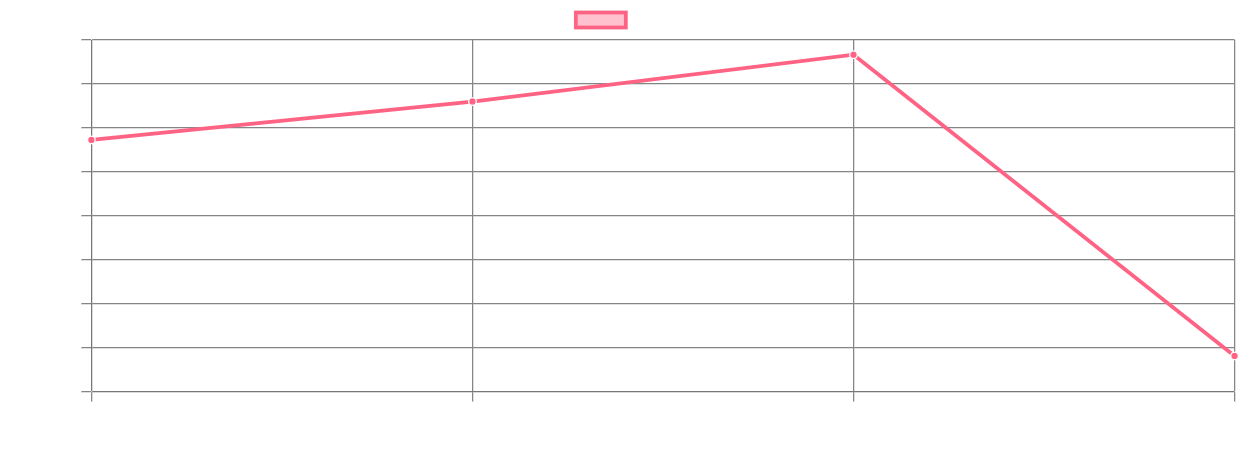

## The data doesn't tell the whole story as data for 2016 spans only for the first half of the year.

In [59]:
SELECT MAX(orderdate) as 'Last recorded order date'
FROM sales.Orders;

(1 row affected)

Total execution time: 00:00:00.039

Last recorded order date
2016-05-31


## **What has been the highest selling products in the company's history (2013 - 2016)?**

## Fragile despatch tape

In [60]:
SELECT j.stockitemname, sum(i.quantity) AS Quantity
FROM sales.OrderLines as i
    INNER JOIN Warehouse.StockItems as j
        ON i.stockitemid = j.stockitemid
GROUP BY i.stockitemid, j.StockItemName
HAVING sum(i.quantity) > '150000'
ORDER BY quantity DESC;

(6 rows affected)

Total execution time: 00:00:00.072

stockitemname,Quantity
Black and orange fragile despatch tape 48mmx75m,207324
Black and orange fragile despatch tape 48mmx100m,193680
Clear packaging tape 48mmx75m,158626
3 kg Courier post bag (White) 300x190x95mm,152375
Shipping carton (Brown) 356x356x279mm,152125
Shipping carton (Brown) 305x305x305mm,151875


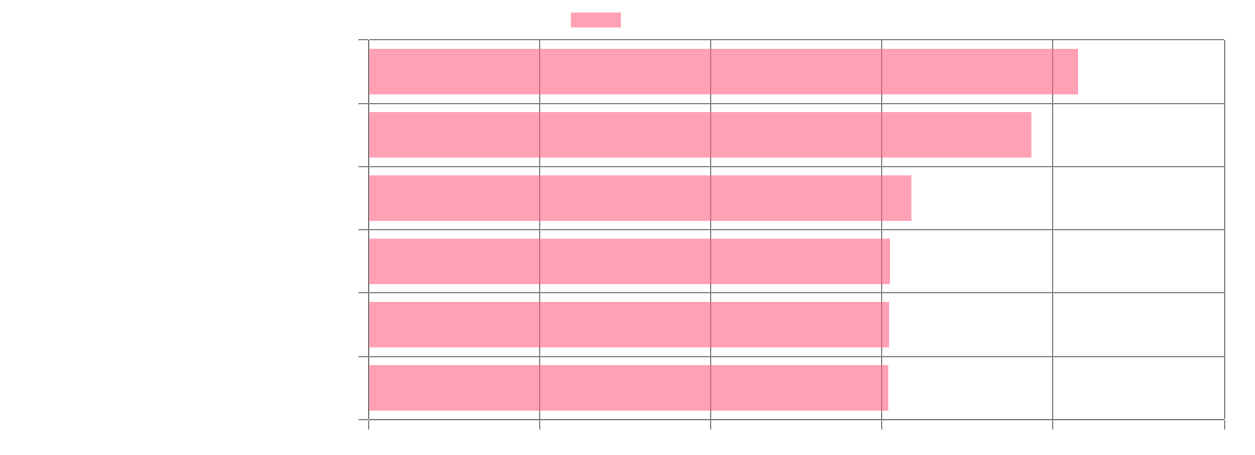

### There have been **six products** that have cross the 150,000 milestone.

## **Which category of shops have shown the most interest?**

## Novelty Shops

In [18]:
SELECT c.CustomerCategoryName, count(a.orderid) as 'Amount of Sales'
FROM sales.orders as a
    INNER JOIN sales.Customers as b
        ON a.CustomerID = b.CustomerID
    INNER JOIN sales.CustomerCategories as c
        ON b.CustomerCategoryID = c.CustomerCategoryID
GROUP BY b.CustomerCategoryID, c.CustomerCategoryName;


(5 rows affected)

Total execution time: 00:00:00.051

CustomerCategoryName,Amount of Sales
Novelty Shop,52547
Gift Store,5089
Corporate,4896
Supermarket,6022
Computer Store,5041


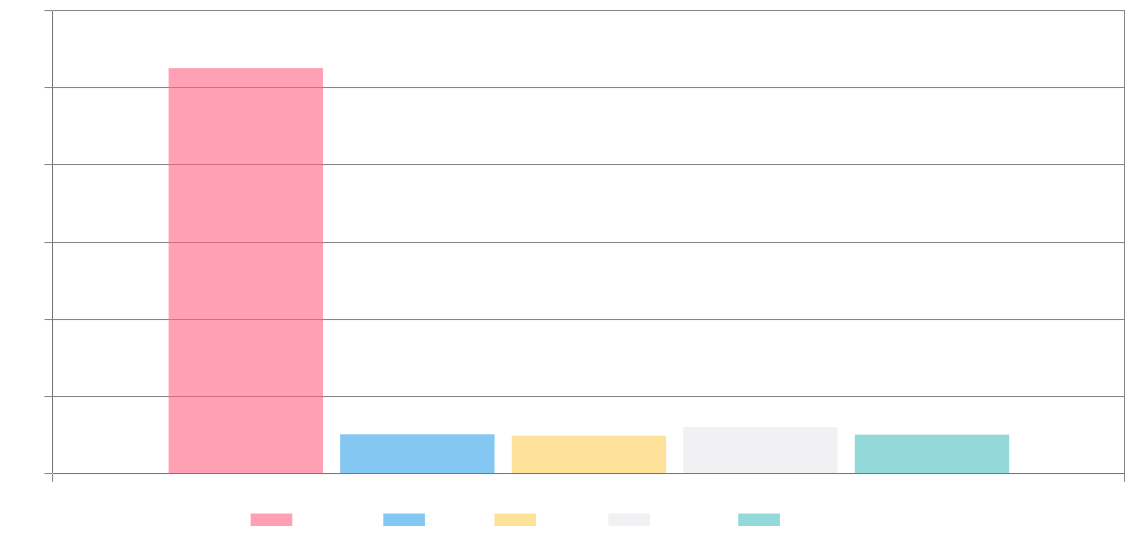

### Novelty shops are a huge category of overall sales.

> ## **<u>Employees:</u>**

In [61]:
DECLARE @Customers INT
DECLARE @Salesperson INT

SET @Customers = (SELECT count(issalesperson) AS 'Customers' 
FROM application.People 
WHERE isemployee = '0')

SET @Salesperson = (SELECT count(issalesperson) AS'Salesperson count'
FROM application.People 
WHERE isemployee = '1' AND isSalesperson = '1')

SELECT @customers as 'Customers count', @salesperson as 'Salesperson count', @customers/@salesperson as 'Customers for every salesperson';

(1 row affected)

Total execution time: 00:00:00.007

Customers count,Salesperson count,Customers for every salesperson
1092,10,109


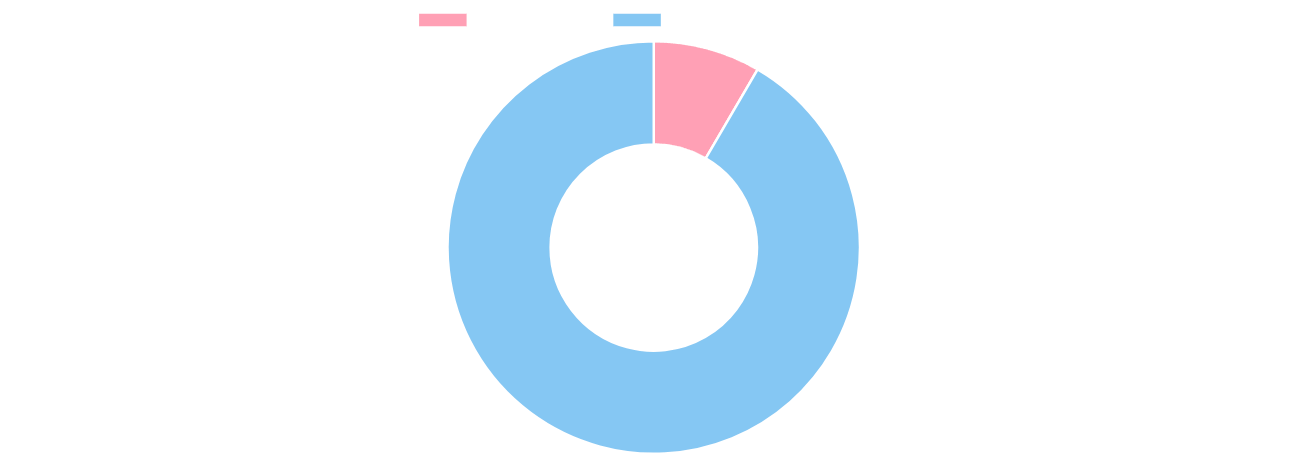

### Each salesperson would have 109 clients based on the report. There may need to be an increase in salesperson.

> ## **<u>Suppliers:</u>**

In [31]:
SELECT count(supplierID) AS 'Items Imported Count' FROM warehouse.StockItems;

Select a.supplierid, b.suppliername, COUNT(a.supplierID) as 'Items Count'
FROM warehouse.StockItems as a
    INNER JOIN Purchasing.Suppliers as b
        ON a.SupplierID = b.SupplierID
GROUP BY a.supplierID, b.SupplierName
ORDER BY COUNT(a.supplierID) DESC;


(1 row affected)

(7 rows affected)

Total execution time: 00:00:00.013

Items Imported Count
227


supplierid,suppliername,Items Count
4,"Fabrikam, Inc.",74
7,"Litware, Inc.",67
5,Graphic Design Institute,42
10,Northwind Electric Cars,18
12,The Phone Company,15
1,A Datum Corporation,8
2,"Contoso, Ltd.",3


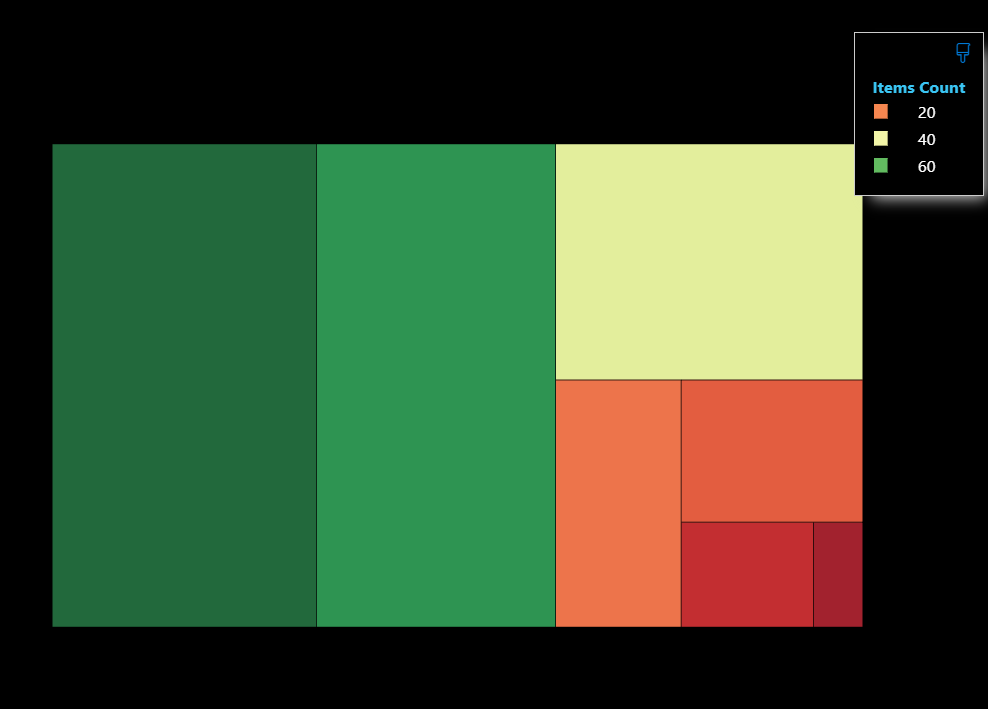

## The treemap shows from green (**most**) to red (l**east**) which supplier have sold the most products to Wide World Orders.

### 

- <u>**Fabrikam**</u> sells the most (darkest green)

- <u>**Contoso**</u> sells the least (darkest red)